In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions

In [9]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [10]:
from jwst_plots import JWSTCatalog
from jwst_plots import make_cat_use, make_cat_raw
import isochrone_plots as isop

In [11]:
cd notebooks/

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [5]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
#'/home/savannahgramze/research/Research/JWST/cloudc/'

# Load Catalog

In [6]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [7]:
reg_filament = Regions.read(f'../regions_/filament_long.region')
reg_filhole = Regions.read(f'../regions_/filhole.region')
reg_cloudd = Regions.read(f'../regions_/cloudd.region')
reg_cloudc1 = Regions.read(f'../regions_/cloudc1.region')
reg_cloudc2 = Regions.read(f'../regions_/cloudc2.region')
#reg_filament_long = Regions.read(f'{basepath}/regions_/filament_long.region')

In [8]:
cat_use = make_cat_use()

In [24]:
cat_raw = make_cat_raw()

In [9]:
cat_filament = JWSTCatalog(cat_use.table_region_mask(reg_filament, wcs=ww))
cat_cloudd =   JWSTCatalog(cat_use.table_region_mask(reg_cloudd, wcs=ww))
cat_cloudc1 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc1, wcs=ww))
cat_cloudc2 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc2, wcs=ww))

In [10]:
mask_outside = ~cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_cloudd, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc1, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc2, wcs=ww)
cat_outside = JWSTCatalog(cat_use.catalog[mask_outside])

In [11]:
mask_filament = cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_filhole, wcs=ww)
cat_only_filament = JWSTCatalog(cat_use.catalog[mask_filament])

In [38]:
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC
isochrone = isop.get_mist_isochrone(distance=8.1*u.kpc, age=6.4, Av=30, ext=CT06_MWGC(), phase=3)

# Color-Magnitude Diagrams

## F187N and F405N

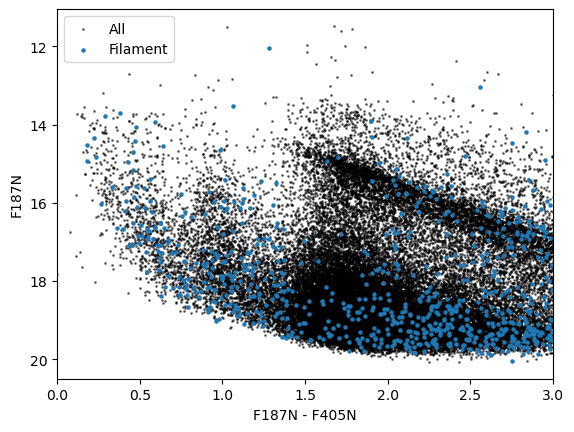

In [12]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

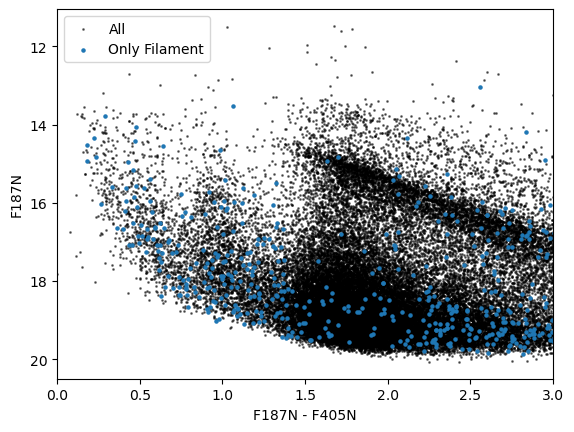

In [13]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
cat_only_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Only Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

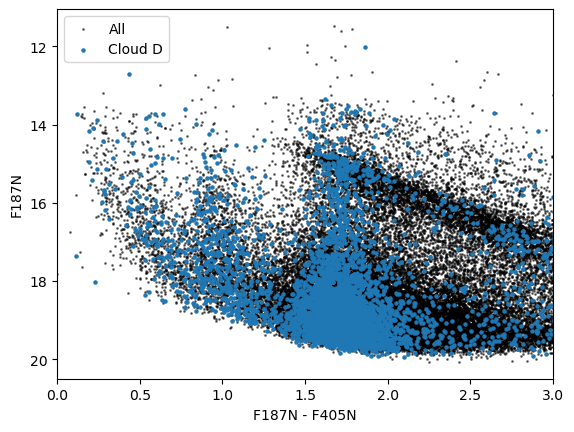

In [14]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

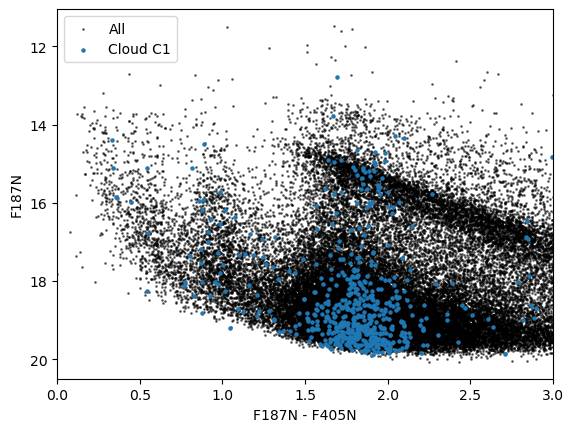

In [15]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

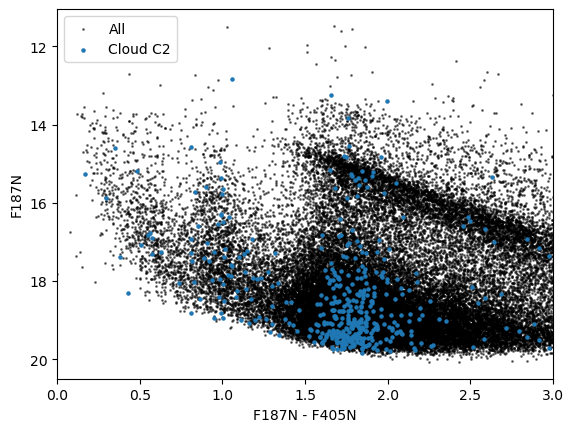

In [16]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


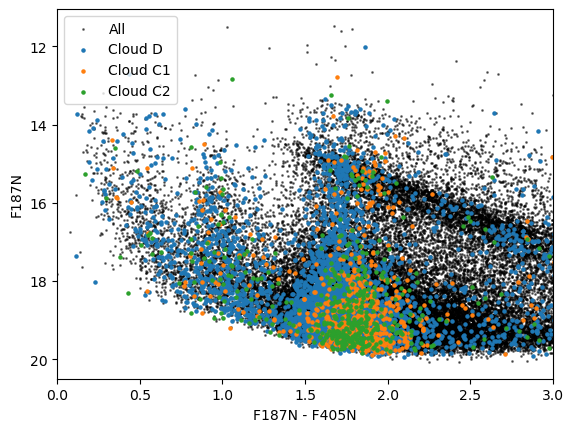

In [17]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

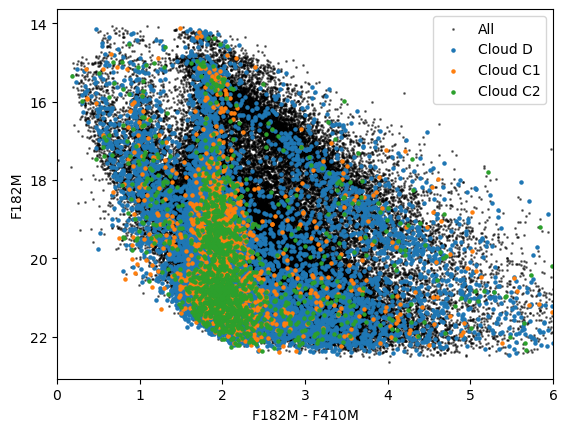

In [18]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F182M', 'F410M', 'F182M', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
cat_cloudd.plot_CMD('F182M', 'F410M', 'F182M', ax=ax, alpha=1, s=5, label='Cloud D')
cat_cloudc1.plot_CMD('F182M', 'F410M', 'F182M', ax=ax, alpha=1, s=5, label='Cloud C1')
cat_cloudc2.plot_CMD('F182M', 'F410M', 'F182M', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 6)
plt.gca().invert_yaxis()

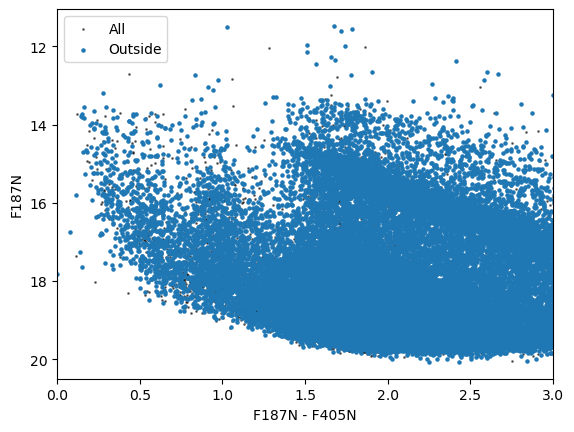

In [19]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')
cat_outside.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Outside')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

## F182M and F410M

(23.0, 14.0)

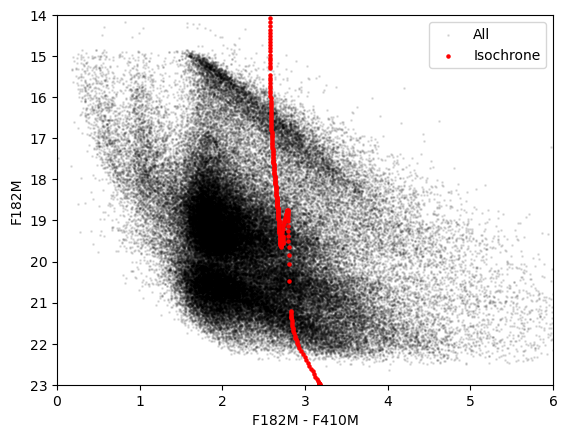

In [39]:
ax1 = plt.subplot(111)
cat_use.plot_CMD('F182M', 'F410M', 'F182M', ax=ax1, alpha=0.1, s=1, label='All', color='black')
isochrone.plot_ext_CMD('F182M', 'F410M', 'F182M', wavelengths=[1.82*u.micron, 4.10*u.micron, 1.82*u.micron], ax=ax1, alpha=1, s=5, label='Isochrone', color='red')
plt.gca().invert_yaxis()
ax1.legend()
ax1.set_xlim(0, 6)
ax1.set_ylim(23, 14)

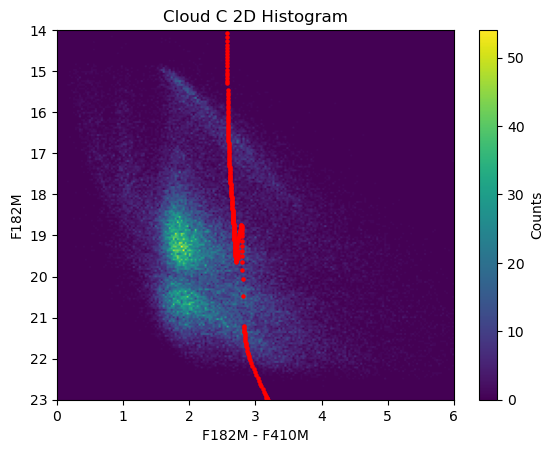

In [40]:
xedges = np.linspace(0, 6, 200)
yedges = np.linspace(14, 23, 200)

x = cat_use.catalog['mag_ab_f182m'] - cat_use.catalog['mag_ab_f410m']
y = cat_use.catalog['mag_ab_f182m']

hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])

ax1 = plt.subplot(111)
# Plot the histogram
im = ax1.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', aspect='auto')
ylims = ax1.get_ylim()
isochrone.plot_ext_CMD('F182M', 'F410M', 'F182M', wavelengths=[1.82*u.micron, 4.10*u.micron, 1.82*u.micron], ax=ax1, alpha=1, s=5, label='Isochrone', color='red')
plt.gca().invert_yaxis()
#plt.plot([2, 4], [20, 22], color='red')
#plt.plot([1, 4], [19.8, 19.8], color='red')
plt.ylim(ylims)
plt.colorbar(im, label='Counts')
plt.xlabel('F182M - F410M')
plt.ylabel('F182M')
plt.title('Cloud C 2D Histogram')
plt.gca().invert_yaxis()
plt.show()

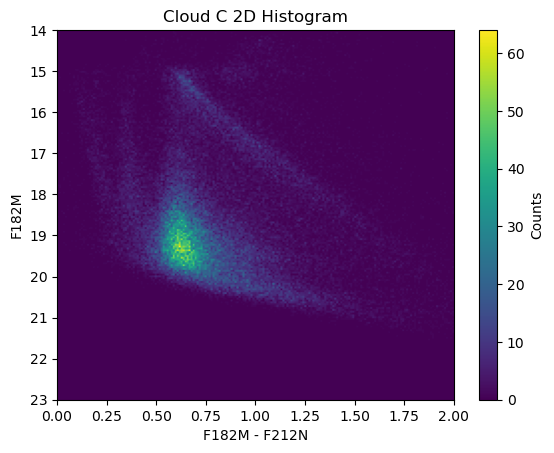

In [22]:
xedges = np.linspace(0, 2, 200)
yedges = np.linspace(14, 23, 200)

x = cat_use.catalog['mag_ab_f182m'] - cat_use.catalog['mag_ab_f212n']
y = cat_use.catalog['mag_ab_f182m']

hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])

# Plot the histogram
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', aspect='auto')
plt.colorbar(label='Counts')
plt.xlabel('F182M - F212N')
plt.ylabel('F182M')
plt.title('Cloud C 2D Histogram')
plt.gca().invert_yaxis()
plt.show()

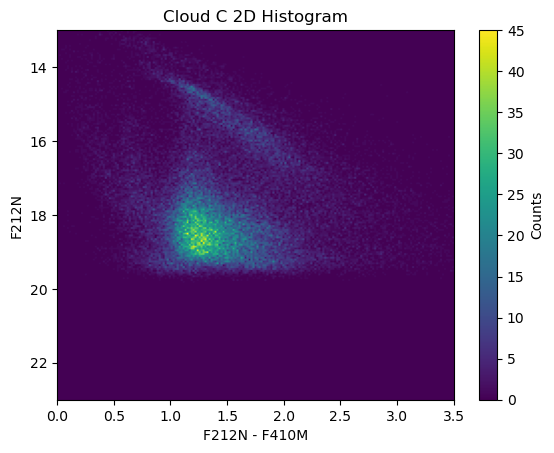

In [23]:
xedges = np.linspace(0, 3.5, 200)
yedges = np.linspace(13, 23, 200)

x = cat_use.catalog['mag_ab_f212n'] - cat_use.catalog['mag_ab_f410m']
y = cat_use.catalog['mag_ab_f212n']

hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])

# Plot the histogram
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', aspect='auto')
plt.colorbar(label='Counts')
plt.xlabel('F212N - F410M')
plt.ylabel('F212N')
plt.title('Cloud C 2D Histogram')
plt.gca().invert_yaxis()
plt.show()

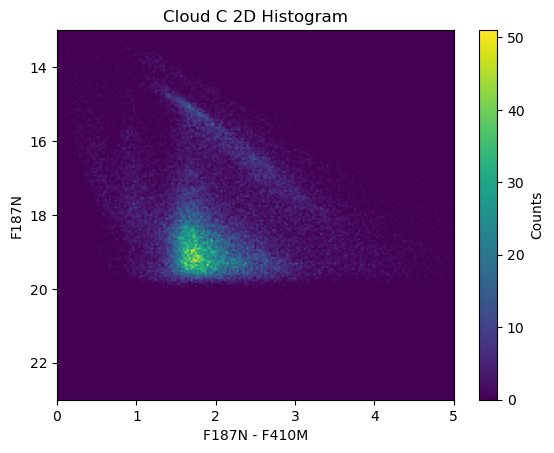

In [24]:
xedges = np.linspace(0, 5, 200)
yedges = np.linspace(13, 23, 200)

x = cat_use.catalog['mag_ab_f187n'] - cat_use.catalog['mag_ab_f410m']
y = cat_use.catalog['mag_ab_f187n']

hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])

# Plot the histogram
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', aspect='auto')
plt.colorbar(label='Counts')
plt.xlabel('F187N - F410M')
plt.ylabel('F187N')
plt.title('Cloud C 2D Histogram')
plt.gca().invert_yaxis()
plt.show()

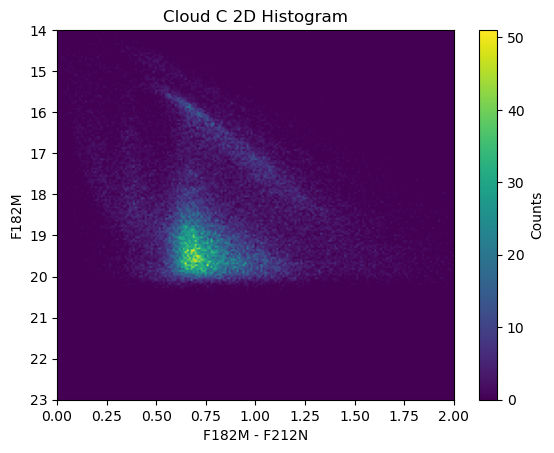

In [25]:
xedges = np.linspace(0, 2, 200)
yedges = np.linspace(14, 23, 200)
x = cat_use.catalog['mag_ab_f182m'] - cat_use.catalog['mag_ab_f212n']
y = cat_use.catalog['mag_ab_f182m']
histx, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])

# Plot the histogram
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', aspect='auto')
plt.colorbar(label='Counts')
plt.xlabel('F182M - F212N')
plt.ylabel('F182M')
plt.title('Cloud C 2D Histogram')
plt.gca().invert_yaxis()
plt.show()

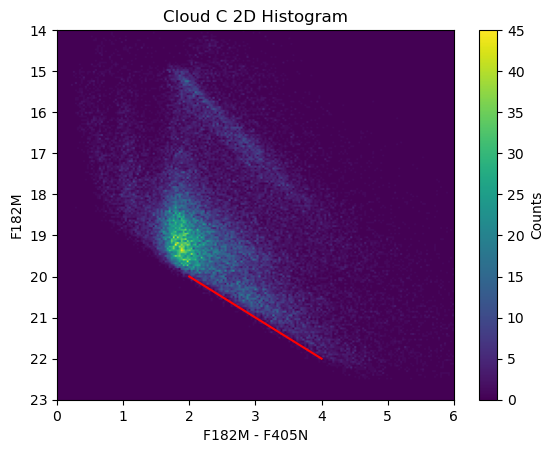

In [26]:
xedges = np.linspace(0, 6, 200)
yedges = np.linspace(14, 23, 200)

x = cat_use.catalog['mag_ab_f182m'] - cat_use.catalog['mag_ab_f405n']
y = cat_use.catalog['mag_ab_f182m']

hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])

# Plot the histogram
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', aspect='auto')
plt.plot([2, 4], [20, 22], color='red')
#plt.plot([2, 4], [20, 20], color='red')
plt.colorbar(label='Counts')
plt.xlabel('F182M - F405N')
plt.ylabel('F182M')
plt.title('Cloud C 2D Histogram')
plt.gca().invert_yaxis()
plt.show()

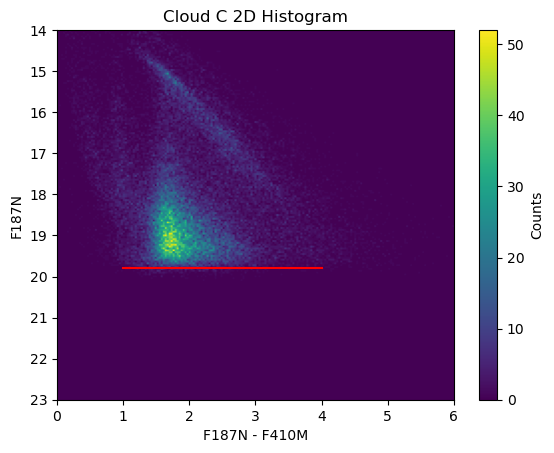

In [27]:
xedges = np.linspace(0, 6, 200)
yedges = np.linspace(14, 23, 200)

x = cat_use.catalog['mag_ab_f187n'] - cat_use.catalog['mag_ab_f410m']
y = cat_use.catalog['mag_ab_f187n']

hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])

# Plot the histogram
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', aspect='auto')
#plt.plot([2, 4], [20, 22], color='red')
plt.plot([1, 4], [19.8, 19.8], color='red')
plt.colorbar(label='Counts')
plt.xlabel('F187N - F410M')
plt.ylabel('F187N')
plt.title('Cloud C 2D Histogram')
plt.gca().invert_yaxis()
plt.show()

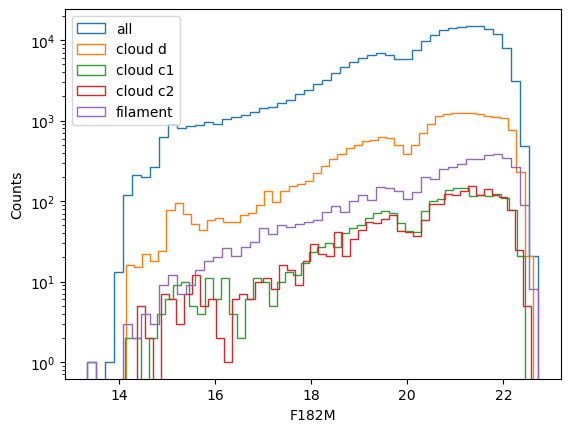

In [28]:

h = plt.hist(cat_use.catalog['mag_ab_f182m'], bins=50, histtype='step', label='all')
h_d = plt.hist(cat_cloudd.catalog['mag_ab_f182m'], bins=50, histtype='step', label='cloud d')
h_c1 = plt.hist(cat_cloudc1.catalog['mag_ab_f182m'], bins=50, histtype='step', label='cloud c1')
h_c2 = plt.hist(cat_cloudc2.catalog['mag_ab_f182m'], bins=50, histtype='step', label='cloud c2')
h_fil = plt.hist(cat_filament.catalog['mag_ab_f182m'], bins=50, histtype='step', label='filament')
plt.xlabel('F182M')
plt.ylabel('Counts')
#plt.gca().invert_xaxis()
plt.yscale('log')
plt.legend()
#plt.xlim(19, 22)
#plt.ylim(10, 20000)

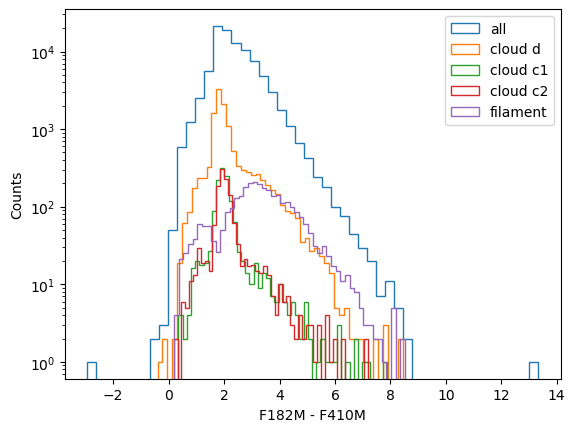

In [29]:

h = plt.hist(cat_use.catalog['mag_ab_f182m']-cat_use.catalog['mag_ab_f410m'], bins=50, histtype='step', label='all')
h_d = plt.hist(cat_cloudd.catalog['mag_ab_f182m']-cat_cloudd.catalog['mag_ab_f410m'], bins=50, histtype='step', label='cloud d')
h_c1 = plt.hist(cat_cloudc1.catalog['mag_ab_f182m']-cat_cloudc1.catalog['mag_ab_f410m'], bins=50, histtype='step', label='cloud c1')
h_c2 = plt.hist(cat_cloudc2.catalog['mag_ab_f182m']-cat_cloudc2.catalog['mag_ab_f410m'], bins=50, histtype='step', label='cloud c2')
h_fil = plt.hist(cat_filament.catalog['mag_ab_f182m']-cat_filament.catalog['mag_ab_f410m'], bins=50, histtype='step', label='filament')
plt.xlabel('F182M - F410M')
plt.ylabel('Counts')
#plt.gca().invert_xaxis()
plt.yscale('log')
plt.legend()

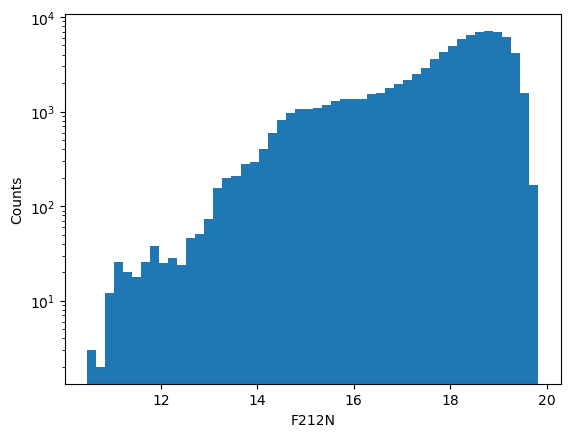

In [30]:
#c = cat_use.catalog['mag_ab_f182m']-cat_use.catalog['mag_ab_f410m']
#mask = (c < 4) & (c > 2)
h = plt.hist(cat_use.catalog['mag_ab_f212n'], bins=50)
plt.xlabel('F212N')
plt.ylabel('Counts')
#plt.gca().invert_xaxis()
plt.yscale('log')

# Extinction Correction

In [12]:
basetable = cat_use.catalog
from dust_extinction.averages import CT06_MWGC
av182410 = (basetable['mag_ab_f182m'] - basetable['mag_ab_f410m']) / (CT06_MWGC()(1.82*u.um) - CT06_MWGC()(4.10*u.um))
a182 = CT06_MWGC()(1.82*u.um)

In [13]:
f182mdr = basetable['mag_ab_f182m'] - a182 * av182410

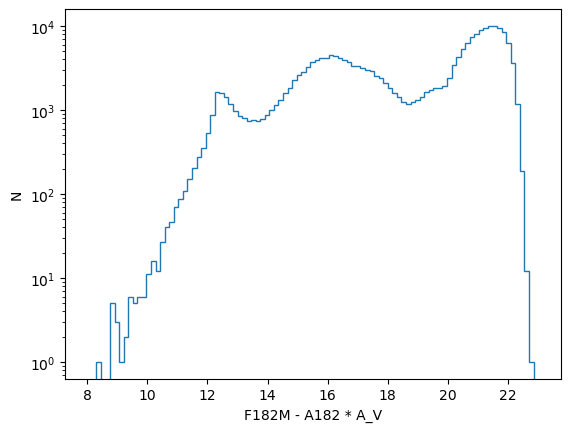

In [14]:
h = plt.hist(f182mdr, bins=np.linspace(8, 23, 100), histtype='step')
plt.xlabel('F182M - A182 * A_V')
plt.ylabel('N')
plt.yscale('log')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


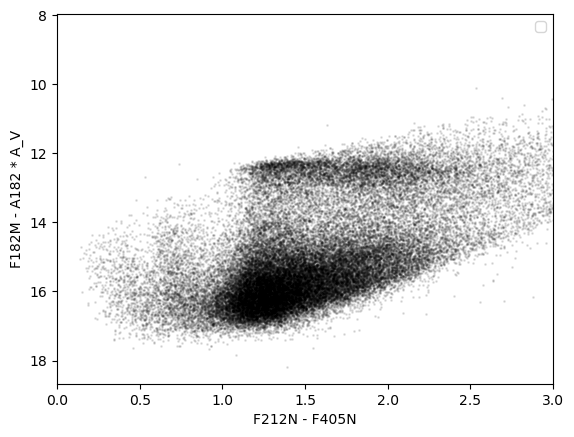

In [15]:
ax = plt.subplot(111)

alpha = 0.1
s = 1

ax.scatter(cat_use.color('F212N', 'F405N'), f182mdr, alpha=alpha, s=s, color='k')
#ax.scatter(cat_filament.color('F182M', 'F212N'), cat_filament.band('F182M') - a182*cat_filament.get_Av_182410(), alpha=0.5, s=1, color='r', label='Filament')
#ax.scatter(cat_cloudd.color('F182M', 'F212N'), cat_cloudd.band('F182M') - a182*cat_cloudd.get_Av_182410(), alpha=0.5, s=1, color='b', label='Cloud D')
#ax.scatter(cat_cloudc1.color('F182M', 'F212N'), cat_cloudc1.band('F182M') - a182*cat_cloudc1.get_Av_182410(), alpha=0.5, s=1, color='g', label='Cloud C1')
#ax.scatter(cat_cloudc2.color('F182M', 'F212N'), cat_cloudc2.band('F182M') - a182*cat_cloudc2.get_Av_182410(), alpha=0.5, s=1, color='m', label='Cloud C2')

ax.set_xlabel('F212N - F405N')
ax.set_ylabel('F182M - A182 * A_V')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


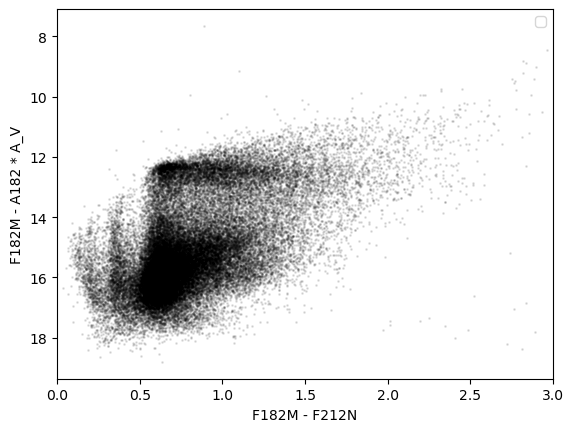

In [16]:
ax = plt.subplot(111)

alpha = 0.1
s = 1

ax.scatter(cat_use.color('F182M', 'F212N'), f182mdr, alpha=alpha, s=s, color='k')
#ax.scatter(cat_filament.color('F182M', 'F212N'), cat_filament.band('F182M') - a182*cat_filament.get_Av_182410(), alpha=0.5, s=1, color='r', label='Filament')
#ax.scatter(cat_cloudd.color('F182M', 'F212N'), cat_cloudd.band('F182M') - a182*cat_cloudd.get_Av_182410(), alpha=0.5, s=1, color='b', label='Cloud D')
#ax.scatter(cat_cloudc1.color('F182M', 'F212N'), cat_cloudc1.band('F182M') - a182*cat_cloudc1.get_Av_182410(), alpha=0.5, s=1, color='g', label='Cloud C1')
#ax.scatter(cat_cloudc2.color('F182M', 'F212N'), cat_cloudc2.band('F182M') - a182*cat_cloudc2.get_Av_182410(), alpha=0.5, s=1, color='m', label='Cloud C2')

ax.set_xlabel('F182M - F212N')
ax.set_ylabel('F182M - A182 * A_V')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()
plt.show()

(0.0, 3.0)

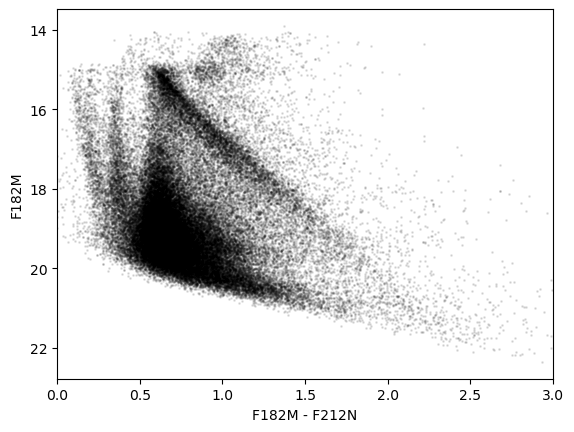

In [39]:
cat_use.plot_CMD('F182M', 'F212N', 'F182M', alpha=0.1, s=1, label='All', color='black')
plt.xlim(0, 3)
#plt.ylim(22, 19)

(0.0, 6.0)

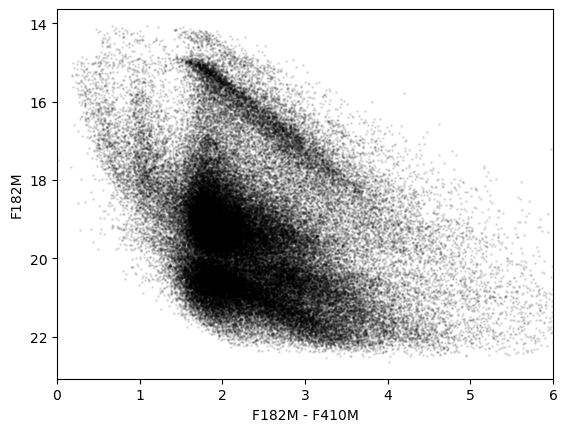

In [40]:
cat_use.plot_CMD('F182M', 'F410M', 'F182M', alpha=0.1, s=1, label='All', color='black')
plt.xlim(0, 6)
#plt.ylim(22, 19)

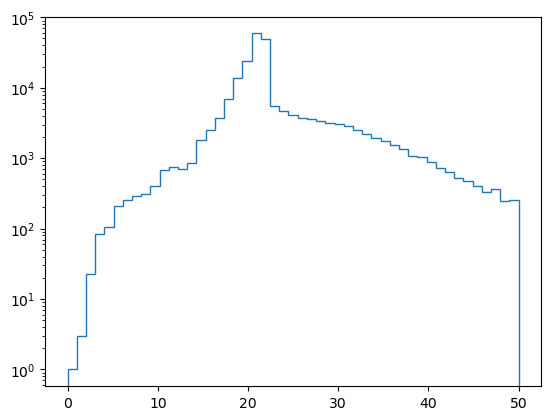

In [41]:
h = plt.hist(av182410, bins=np.linspace(0, 50), histtype='step', label='all')
plt.yscale('log')

In [ ]:
stellar lifetime times number of stars
pop synth tool